In [1]:
# Import Necessary Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from os.path import join, isfile
from os import listdir
from itertools import chain
import os
#import cv2
from PIL import Image
import glob
import tqdm

In [3]:
labels_df = pd.read_csv('/Users/ryanjoseph/Desktop/Yale/Repositories/Pneumonia/ChestXRay-14/Labels/Data_Entry_2017.csv')
labels_df.columns = ['Image_Index', 'Finding_Labels', 'Follow_Up_#', 'Patient_ID',
                  'Patient_Age', 'Patient_Gender', 'View_Position',
                  'Original_Image_Width', 'Original_Image_Height',
                  'Original_Image_Pixel_Spacing_X',
                  'Original_Image_Pixel_Spacing_Y']

#print(labels_df.head(5))



In [4]:
# Focus on Finding Labels
num = 0
for i in labels_df['Finding_Labels']:
    if i == 'Effusion':
        num += 1
print(num)

3955


# Diseases Classes

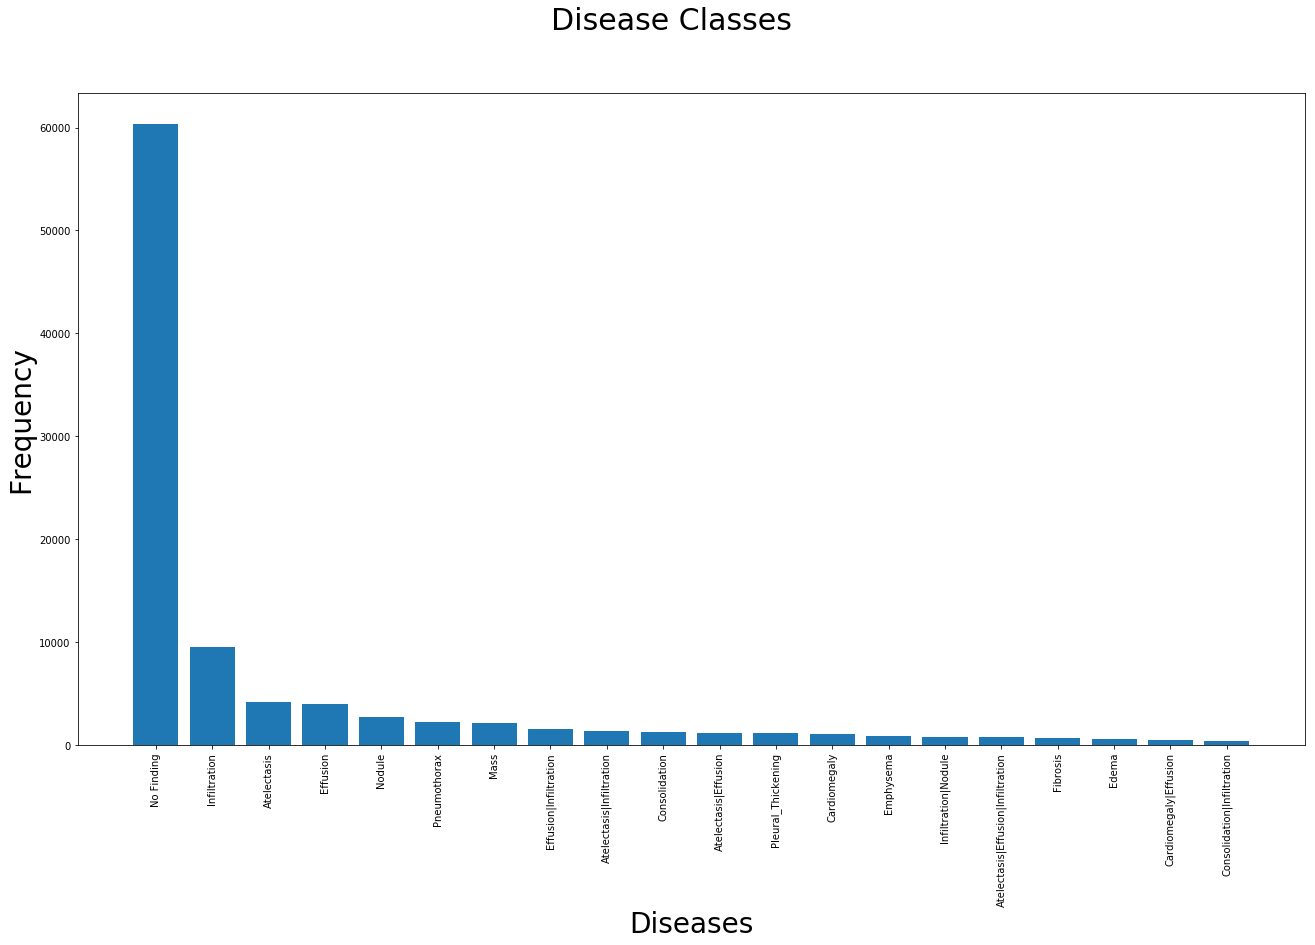

In [5]:
# We want to focus on Pneumonia
label_number = labels_df['Finding_Labels'].value_counts() # Remember Value Counts at end
fig, ax1 = plt.subplots(1, 1, figsize = (22, 12))

fig.suptitle('Disease Classes', fontsize=30)
plt.xlabel('Diseases', fontsize=28)
plt.ylabel('Frequency', fontsize=28)



ax1.bar(np.arange(len(label_number[:20])) + 0.5, label_number[:20])
ax1.set_xticks(np.arange(len(label_number[:20])) + 0.5)
full = ax1.set_xticklabels(label_number[:20].index, rotation = 90)

# Gender Imbalance

There are 112120 Patients in the dataset.
There are 63340 Males.
There are 48780 Females.
56.0% are Males
44.0% are Females


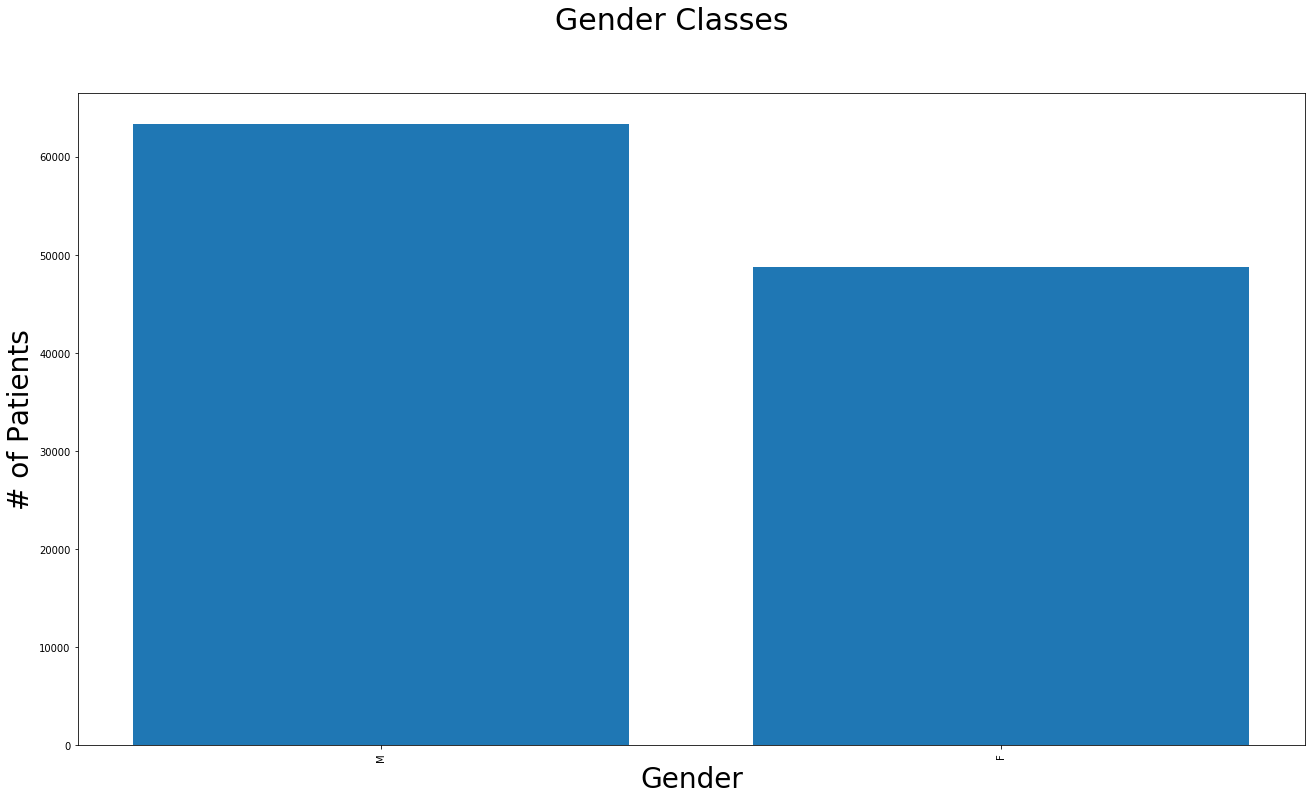

In [6]:
gender_number = labels_df['Patient_Gender'].value_counts() 
fig, ax1 = plt.subplots(1, 1, figsize = (22, 12))


fig.suptitle('Gender Classes', fontsize=30)
plt.xlabel('Gender', fontsize=28)
plt.ylabel('# of Patients', fontsize=28)


ax1.bar(np.arange(len(gender_number[:2])) + 0.5, gender_number[:2])
ax1.set_xticks(np.arange(len(gender_number[:2])) + 0.5)
full = ax1.set_xticklabels(gender_number[:2].index, rotation = 90)

print('There are {} Patients in the dataset.'.format(gender_number[1]+gender_number[0]))
print('There are {} Males.'.format(gender_number[0]))
print('There are {} Females.'.format(gender_number[1]))
print('{}% are Males'.format(round((gender_number[0]/(gender_number[1]+gender_number[0])*100))))
print('{}% are Females'.format(round((gender_number[1]/(gender_number[1]+gender_number[0])*100))))






# Age

In [7]:
age_number = labels_df['Patient_Age'].value_counts()

super_old = 0

for i in age_number:
    if i > 60 and i < 70:
        super_old += 1
        
print(super_old)

2


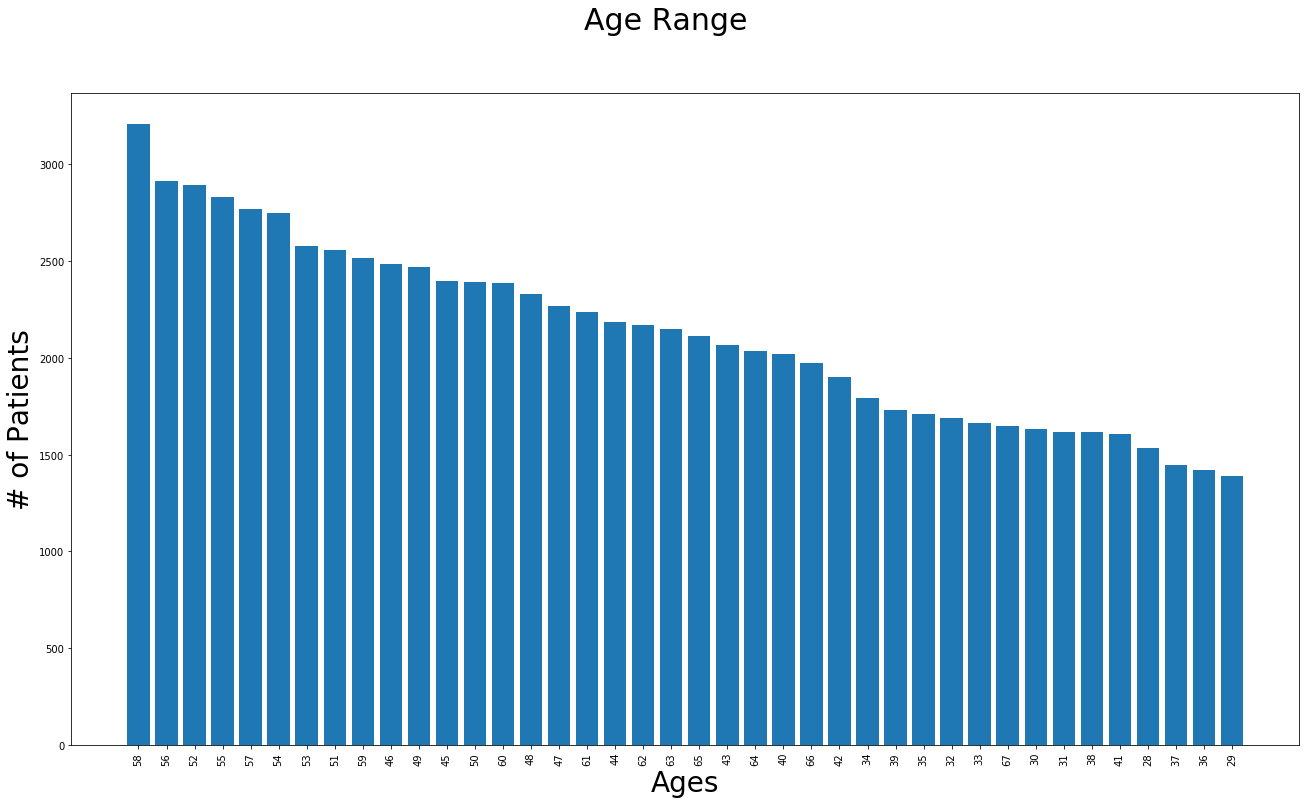

In [8]:

fig, ax1 = plt.subplots(1, 1, figsize = (22, 12))


fig.suptitle('Age Range', fontsize=30)
plt.xlabel('Ages', fontsize=28)
plt.ylabel('# of Patients', fontsize=28)


ax1.bar(np.arange(len(age_number[:40])) + 0.5, age_number[:40])
ax1.set_xticks(np.arange(len(age_number[:40])) + 0.5)
full = ax1.set_xticklabels(age_number[:40].index, rotation = 90)

In [9]:
print(labels_df.head())

        Image_Index          Finding_Labels  Follow_Up_#  Patient_ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient_Age Patient_Gender View_Position  Original_Image_Width  \
0           58              M            PA                  2682   
1           58              M            PA                  2894   
2           58              M            PA                  2500   
3           81              M            PA                  2500   
4           81              F            PA                  2582   

   Original_Image_Height  Original_Image_Pixel_Spacing_X  \
0                   2749                           0.143   
1                   2729        

In [10]:
all_df = labels_df
all_df['Finding_Labels'] = all_df['Finding_Labels'].map(lambda x: x.replace('No_Finding', ''))

all_labels = np.unique(list(chain(*all_df['Finding_Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]

print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [11]:
for label in all_labels:
    if len(label) > 1: # leave out empty labels
        all_df[label] = all_df['Finding_Labels'].map(lambda finding: 1.0 if label in finding else 0)
        
all_df.sample(5)

,Image_Index,Finding_Labels,Follow_Up_#,Patient_ID,Patient_Age,Patient_Gender,View_Position,Original_Image_Width,Original_Image_Height,Original_Image_Pixel_Spacing_X,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
13594,00003528_003.png,Nodule,3,3528,42,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88067,00021782_034.png,Emphysema|Infiltration|Pleural_Thickening,34,21782,31,F,PA,2992,2991,0.143,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
27152,00007070_000.png,No Finding,0,7070,56,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
91264,00022764_008.png,No Finding,8,22764,70,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24862,00006523_001.png,No Finding,1,6523,50,F,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
all_df_pneumonia = all_df[all_df['Pneumonia'] == 1]
#print(all_df_pneumonia.head)

all_df_pneumonia = all_df_pneumonia['Image_Index']
print(all_df_pneumonia)

48        00000013_010.png
126       00000032_012.png
253       00000056_000.png
276       00000061_012.png
279       00000061_015.png
                ...       
111557    00030536_007.png
111627    00030570_001.png
111767    00030621_002.png
111845    00030637_016.png
112115    00030801_001.png
Name: Image_Index, Length: 1431, dtype: object


In [37]:
all_df_cardiomegaly = all_df[all_df['Cardiomegaly'] == 1]


all_df_cardiomegaly_neg = all_df[all_df['Finding_Labels'] == ' ']
all_df_cardiomegaly_neg = all_df_cardiomegaly_neg.sample(all_df_cardiomegaly.shape[0])
print(all_df_cardiomegaly_neg)

ValueError: a must be greater than 0 unless no samples are taken